Universidade Federal de Santa Catarina<br>
Departamento de Engenharia Elétrica e Eletrônica<br>
EEL7514/EEL7513 - Introdução ao Aprendizado de Máquina

**Aluno:** Rodrigo Kobashikawa Rosa<br>
**Matrícula:** 14201073
$\newcommand{\bX}{\mathbf{X}}$
$\newcommand{\bw}{\mathbf{w}}$
$\newcommand{\by}{\mathbf{y}}$
$\newcommand{\bx}{\mathbf{x}}$
$\newcommand{\RR}{\mathbb{R}}$
$\newcommand{\calS}{\mathcal{S}}$


# Exercício 6: Redes Neurais

Neste exercício você irá construir modelos de redes neurais para realizar classificação e regressão.

In [1]:
import pandas as pd
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split

def plot_data(X, y):
    ''' Plot 2-D binary dataset '''
    if len(y.shape) > 1: raise RuntimeError('y must be a 1-D array')
    plt.plot(X[y!=1,0],X[y!=1,1],'bo',X[y==1,0],X[y==1,1],'rx')
    return

def plot_boundary(model, X, N=100):
    ''' Plot boundary for a 2-D binary classifier '''
    from scipy.special import logit
    x1 = np.linspace(X[:,0].min(), X[:,0].max(), N)
    x2 = np.linspace(X[:,1].min(), X[:,1].max(), N)
    xx1, xx2 = np.meshgrid(x1, x2)
    X = np.c_[xx1.reshape(-1), xx2.reshape(-1)]
    z = logit(model.predict_proba(X)[:,1].reshape(xx1.shape))
    plt.contourf(xx1,xx2,np.sign(z),cmap=plt.cm.bwr,vmin=-3,vmax=3)
    plt.contour(xx1,xx2,z,cmap=plt.cm.gray,vmin=np.inf,vmax=np.inf,levels=[0])
    return


# Conjunto de dados #1

O primeiro conjunto de dados é gerado pelos comandos abaixo.

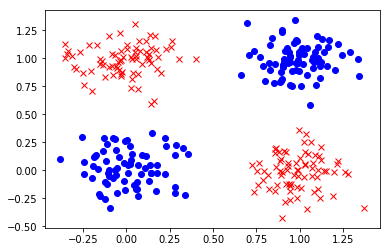

In [2]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=400, n_features=2, centers=[[0,0],[1,1],[0,1],[1,0]], cluster_std=0.15, random_state=0)
y = (y >= 2).astype(float)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/4, random_state=0)
plot_data(X_train,y_train)

Para fins de comparação, utilize primeiramente um modelo de regressão logística sem regularização através da biblioteca sklearn. Para este e demais modelos deste exercício, realize o treinamento sempre usando o método de otimização L-BFGS (`solver='lbfgs'`).

Train accuracy: 0.49333333333333335
Test accuracy: 0.45


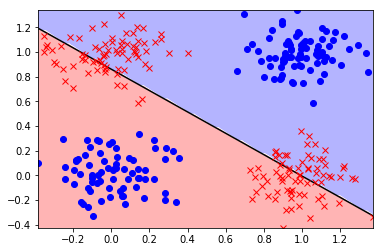

In [3]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(C=np.inf, solver='lbfgs')
model.fit(X_train, y_train)
plot_boundary(model, X_train)
plot_data(X_train, y_train)
print('Train accuracy:',model.score(X_train, y_train))
print('Test accuracy:',model.score(X_test, y_test))

Obtenha os pesos $b$ e $\bw$ do modelo treinado (veja na [documentação](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)).

Em seguida, utilize uma rede neural de 1 camada (nenhuma camada oculta) com ativação de saída logística e sem regularização e confirme que os dois modelos são idênticos. Para isso, obtenha os pesos do modelo e a função de ativação de saída (veja novamente a [documentação](http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html)). (Obs: ao contrário da literatura, a sklearn contabiliza a camada de entrada no número de camadas da rede.) Note que o parâmetro `activation` refere-se à ativação das camadas ocultas e portanto é irrelevante neste caso particular, podendo ser escolhido como `'identity'`, o que corresponde a uma ativação linear. Note também que `alpha` é o parâmetro de regularização, equivalente a `1/C`.

Train accuracy: 0.49333333333333335
Test accuracy: 0.45


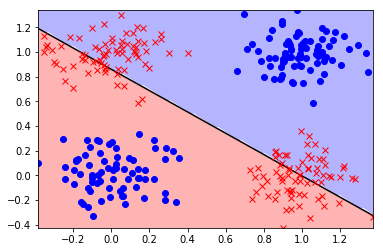

In [4]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(hidden_layer_sizes=[], activation='identity', solver='lbfgs', alpha=0)
model.fit(X_train, y_train)
plot_boundary(model, X_train)
plot_data(X_train, y_train)
print('Train accuracy:',model.score(X_train, y_train))
print('Test accuracy:',model.score(X_test, y_test))

Ainda com `activation='identity'`, o que acontece quando se aumenta o número de camadas ocultas e o número de unidades por camada (`hidden_layer_sizes`)? Por quê?

Em seguida, altere para ativação logística nas camadas ocultas, adicione uma camada oculta com 2 unidades, e treine novamente o modelo, possivelmente rodando diversas vezes até obter uma classificação praticamente perfeita (99% de acurácia).

Você observa uma variância muito grande entre os modelos obtidos a cada treinamento? Por quê você acredita que isso ocorre? Explique.

Agora, experimente aumentar o número de unidades da camada oculta (mantendo ainda uma única camada oculta) e observe as regiões obtidas a cada novo treinamento. Em seguida, varie também o parâmetro de regularização até encontrar uma configuração em que os modelos obtidos são praticamente invariantes a cada nova realização do treinamento.

# Conjuntos de dados #2

O próximo conjunto de dados pode ser carregado pelo comando abaixo. Para simplificar, não usaremos conjunto de teste.

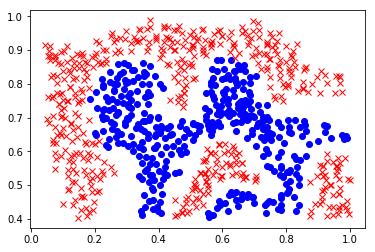

In [5]:
data = loadmat('data/svm2.mat')
X, y = data['X'], data['y'].reshape(-1)
plot_data(X,y)

De forma a demonstrar a flexibilidade das redes neurais, o seu objetivo aqui é obter 100% de acurácia neste conjunto de dados. Utilize uma rede neural com 1 única camada oculta com ativação logística, mas adicione quantas unidades forem necessárias. Provavelmente você precisará também aumentar o número de iterações do treinamento, através do parâmetro `max_iter`.

# Conjuntos de dados #3

O próximo conjunto de dados pode ser carregado pelo comando abaixo e corresponde a um problema de regressão.

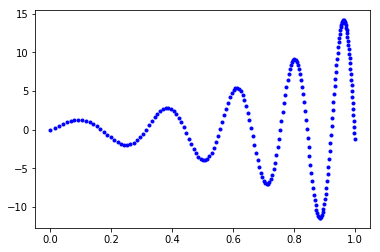

In [6]:
def generate_dataset(n_samples=200, noise=0.0):
    np.random.seed(0)
    x = np.random.permutation(1-np.exp(-np.linspace(0,2.5,n_samples)))
    y = np.sin(2*np.pi*3*np.exp(x))*np.exp(3*x) + noise*np.random.randn(n_samples)
    x = x/x.max()
    X = x.reshape(-1,1)
    return X, y

def plot_predict(model, X, y, N=1000):
    x = np.linspace(X[:,0].min(), X[:,0].max(), N)
    y_hat = model.predict(x.reshape(-1,1))
    plt.plot(X[:,0],y,'b.');
    plt.plot(x,y_hat,'r-');
    plt.legend(['True', 'Predicted'])
    return

X, y = generate_dataset()
plt.plot(X[:,0],y,'b.');

Utilize uma rede neural com ativação de saída linear e perda quadrática (modelo [MLPRegressor](http://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html) da sklearn) para obter um ajuste praticamente perfeito, em particular, com coeficiente R2 de pelo menos 0.999. Fique à vontade para aumentar o número de camadas/unidades/iterações, bem como experimentar outras funções de ativação. Note que o caso abaixo corresponde a uma regressão linear.

R2 score: 0.052383379566864674


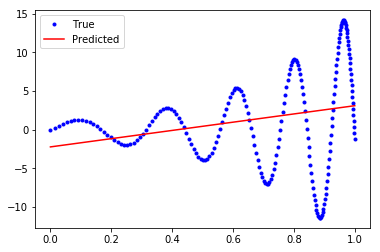

In [7]:
from sklearn.neural_network import MLPRegressor
model = MLPRegressor(hidden_layer_sizes=[], activation='logistic', solver='lbfgs', alpha=0.0, max_iter=200)
model.fit(X,y)
plot_predict(model,X,y)
print('R2 score:',model.score(X,y))

Em seguida, observe as funções (do único atributo de entrada, $x$) produzidas pelas unidades da primeira camada oculta. Para isso, complete o código abaixo.

```python
from scipy.special import expit as sigmoid
if model.n_layers_ < 3: raise RuntimeError('Must use at least one hidden layer')
for i in range(model.intercepts_[0].shape[0]):
    b = model.intercepts_[0][i]
    w = model.coefs_[0][0,i]
    x = np.linspace(0,1,100)
    f = ???
    plt.plot(x,f,'b-')
    plt.show()
```

# Conjuntos de dados #4

O último conjunto de dados é formado por imagens de gatos ($y=1$) e não-gatos ($y=0$), cada uma com 64x64x3 pixels (3 canais RGB), com valores de intensidade inteiros entre 0 e 255. As imagens já estão separadas em um conjunto de treinamento com 209 amostras e um conjunto de teste com 50 amostras.

In [8]:
import h5py
train_data = h5py.File('data/train_catvnoncat.h5', 'r')
train_images = train_data['train_set_x'][:]
train_labels = train_data['train_set_y'][:]
test_data = h5py.File('data/test_catvnoncat.h5', 'r')
test_images = test_data['test_set_x'][:]
test_labels = test_data['test_set_y'][:]

print(train_images.shape, train_labels.shape)
print(test_images.shape, test_labels.shape)
print(train_images.min())
print(train_images.max())

(209, 64, 64, 3) (209,)
(50, 64, 64, 3) (50,)
0
255


1


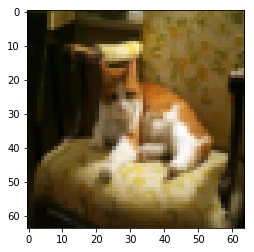

In [9]:
# Exemplo de uma imagem
i = 7
plt.imshow(train_images[i])
print(train_labels[i])

Como cada conjunto de dados é um array 4-D com dimensões $m \times 64 \times 64 \times 3$, devemos primeiramente convertê-los em uma matriz de atributos com dimensões $m \times 12288$. Além disso, é uma boa prática normalizar os dados, o que, nesse caso, pode ser feito simplesmente dividindo-se cada atributo por 255, de forma que cada atributo esteja na faixa [0,1].

In [10]:
X_train = train_images
X_train = X_train.reshape(X_train.shape[0],-1)/255
y_train = train_labels

X_test = test_images
X_test = X_test.reshape(X_test.shape[0],-1)/255
y_test = test_labels

Seu objetivo para esta questão é obter pelo menos **72% de acurácia** no conjunto de teste.

# (OPCIONAL)

1. Visualize os pesos da primeira camada oculta, seguindo o exemplo mostrado [aqui](http://scikit-learn.org/stable/auto_examples/neural_networks/plot_mnist_filters.html).

2. Escolha um outro conjunto de dados da sua preferência e tente classificá-lo usando uma rede neural. Ex:
```python
mnist = sklearn.datasets.fetch_mldata('MNIST original', data_home='./data')
```

---

# Resolução

## Bibliotecas

In [11]:
import pandas as pd
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPRegressor
from scipy.special import expit as sigmoid
from sklearn.datasets import fetch_mldata
import h5py

## Funções

### Funções de plot

In [12]:
def plot_data(X, y):
    ''' Plot 2-D binary dataset '''
    if len(y.shape) > 1: raise RuntimeError('y must be a 1-D array')
    plt.plot(X[y!=1,0],X[y!=1,1],'bo',X[y==1,0],X[y==1,1],'rx')
    return

def plot_boundary(model, X, N=100):
    ''' Plot boundary for a 2-D binary classifier '''
    from scipy.special import logit
    x1 = np.linspace(X[:,0].min(), X[:,0].max(), N)
    x2 = np.linspace(X[:,1].min(), X[:,1].max(), N)
    xx1, xx2 = np.meshgrid(x1, x2)
    X = np.c_[xx1.reshape(-1), xx2.reshape(-1)]
    z = logit(model.predict_proba(X)[:,1].reshape(xx1.shape))
    plt.contourf(xx1,xx2,np.sign(z),cmap=plt.cm.bwr,vmin=-3,vmax=3)
    plt.contour(xx1,xx2,z,cmap=plt.cm.gray,vmin=np.inf,vmax=np.inf,levels=[0])
    return

def plot_predict(model, X, y, N=1000):
    x = np.linspace(X[:,0].min(), X[:,0].max(), N)
    y_hat = model.predict(x.reshape(-1,1))
    plt.plot(X[:,0],y,'b.');
    plt.plot(x,y_hat,'r-');
    plt.legend(['True', 'Predicted'])
    return

### Gerador de dataset

In [13]:
def generate_dataset(n_samples=200, noise=0.0):
    np.random.seed(0)
    x = np.random.permutation(1-np.exp(-np.linspace(0,2.5,n_samples)))
    y = np.sin(2*np.pi*3*np.exp(x))*np.exp(3*x) + noise*np.random.randn(n_samples)
    x = x/x.max()
    X = x.reshape(-1,1)
    return X, y


## Conjunto de Dados #1

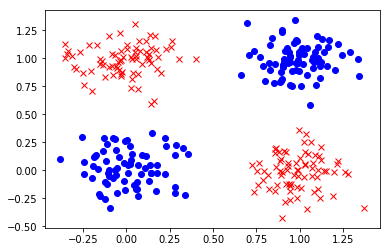

In [81]:
X, y = make_blobs(n_samples=400, n_features=2, centers=[[0,0],[1,1],[0,1],[1,0]], cluster_std=0.15, random_state=0)
y = (y >= 2).astype(float)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/4, random_state=0)
plot_data(X_train,y_train)

Modelo de regressão logística sem regularização com otimização L-BFGS

Train accuracy: 0.49333333333333335
Test accuracy: 0.45


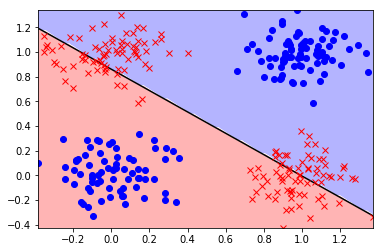

In [82]:
model = LogisticRegression(C=np.inf, solver='lbfgs')
model.fit(X_train, y_train)
plot_boundary(model, X_train)
plot_data(X_train, y_train)
print('Train accuracy:',model.score(X_train, y_train))
print('Test accuracy:',model.score(X_test, y_test))

Pesos b e w do modelo

In [83]:
print("w: ", model.coef_)
print("b: ", model.intercept_)

w:  [[-0.14072583 -0.16260896]]
b:  [0.13996416]


Rede neural de 1 camada com ativação de saída logistica e sem regularização

Train accuracy: 0.49333333333333335
Test accuracy: 0.45


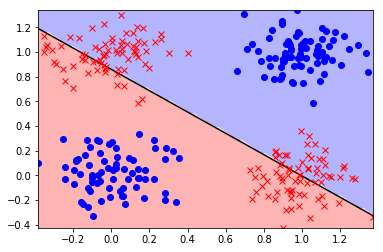

In [84]:
model = MLPClassifier(hidden_layer_sizes=[], activation='identity', solver='lbfgs', alpha=0)
model.fit(X_train, y_train)
plot_boundary(model, X_train)
plot_data(X_train, y_train)
print('Train accuracy:',model.score(X_train, y_train))
print('Test accuracy:',model.score(X_test, y_test))

Observamos que os pesos são identicos ao exemplo de regressão logística anterior. A razão disso é que sem camadas ocultas, o modelo é basicamente igual à regressão logística.

In [85]:
print("w: ", model.coefs_)
print("b: ", model.intercepts_)
print("ativação de saida: ",model.out_activation_)

w:  [array([[-0.14043225],
       [-0.16260224]])]
b:  [array([0.13975415])]
ativação de saida:  logistic


Aumentando o número de camadas ocultas e o número de unidades por camada não altera o resultado, pois a ativação identidade mantém a linearidade do modelo.

Train accuracy: 0.48
Test accuracy: 0.45


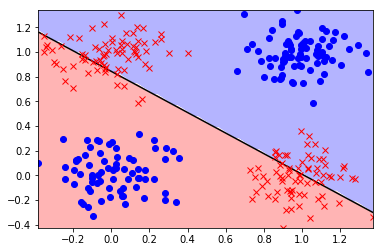

In [86]:
model = MLPClassifier(hidden_layer_sizes=(100,100,100,), activation='identity', solver='lbfgs', alpha=0)
model.fit(X_train, y_train)
plot_boundary(model, X_train)
plot_data(X_train, y_train)
print('Train accuracy:',model.score(X_train, y_train))
print('Test accuracy:',model.score(X_test, y_test))

Mudando para ativação logística na camada oculta, conseguimos 99% de acurácio com apenas uma camada de duas unidades após algumas tentativas devido aos pesos das camadas ocultas não poderem ser inicializados em 0 e portanto são inicializados randomicamente.

Train accuracy: 0.9866666666666667
Test accuracy: 0.99


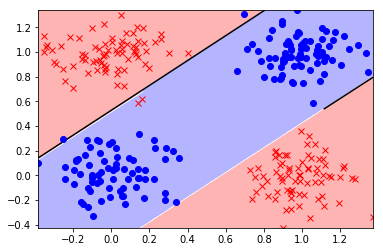

In [90]:
model = MLPClassifier(hidden_layer_sizes=[2], activation='logistic', solver='lbfgs', alpha=0)
model.fit(X_train, y_train)
plot_boundary(model, X_train)
plot_data(X_train, y_train)
print('Train accuracy:',model.score(X_train, y_train))
print('Test accuracy:',model.score(X_test, y_test))

Aumentando para 10 unidades na camada oculta e adicionando regularização é possível conseguir 100% de acurácia sem grandes variações entre modelos.

A regularização limita o grau de liberdade do modelo, dando prioridade para os pesos menores, e portanto ajustando corretamente é possível fazer com que o modelo não varie tanto.

Train accuracy: 1.0
Test accuracy: 1.0


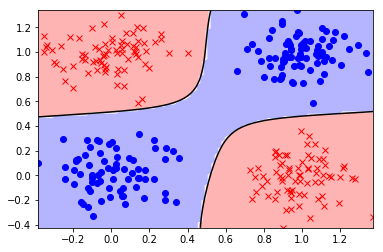

In [21]:
model = MLPClassifier(hidden_layer_sizes=[10], activation='logistic', solver='lbfgs', alpha=0.5)
model.fit(X_train, y_train)
plot_boundary(model, X_train)
plot_data(X_train, y_train)
print('Train accuracy:',model.score(X_train, y_train))
print('Test accuracy:',model.score(X_test, y_test))

## Conjunto de Dados #2

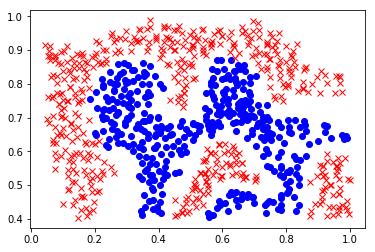

In [78]:
data = loadmat('data/svm2.mat')
X, y = data['X'], data['y'].reshape(-1)
plot_data(X,y)

Testando alguns valores de unidades por camada, regularização e numero de iterações do treinamento foi possível conseguir 100% de acurácia.

Esse resultado demonstra a capacidade da rede neural de representar qualquer função dado unidades suficientes da camada oculta.

Train accuracy: 1.0
Test accuracy: 1.0


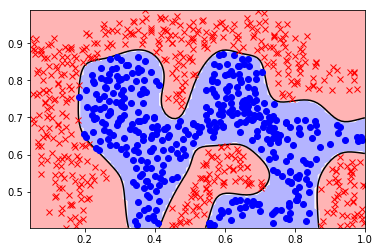

In [80]:
model = MLPClassifier(hidden_layer_sizes=[50], activation='logistic', solver='lbfgs', alpha=1e-3,max_iter=500)
model.fit(X, y)
plot_boundary(model, X)
plot_data(X, y)
print('Train accuracy:',model.score(X, y))
print('Test accuracy:',model.score(X, y))

## Conjunto de Dados #3

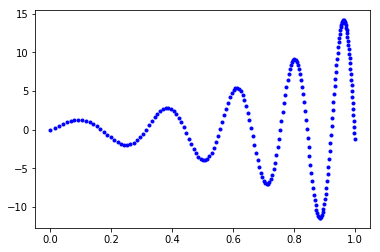

In [54]:
X, y = generate_dataset()
plt.plot(X[:,0],y,'b.');

O objetivo era conseguir um score R2 de pelo menos 0.999 e com um modelo de 3 camadas de 30 unidades com ativação logística e alpha de 1e-6 foi possivel obter um score R2 de 0.9994. Foi testado a função de ativação relu, porém não obteve resultados muito bons.

R2 score: 0.999492668716555


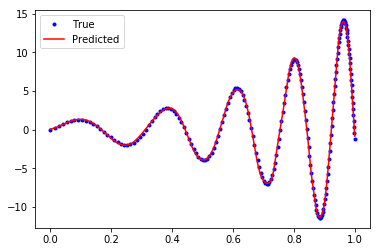

In [76]:
model = MLPRegressor(hidden_layer_sizes=(30,30,30,), activation='logistic', solver='lbfgs', alpha=1e-6, max_iter=500)
model.fit(X,y)
plot_predict(model,X,y)
print('R2 score:',model.score(X,y))

Funções (sigma(w*x + b)) produzidas pelas unidades da primeira camada oculta.

A composição dessas funções constrói o sinal que queremos obter. Observa-se que algumas estão repetidas e portanto é bem capaz que pudesse ser utilizado menos unidades.

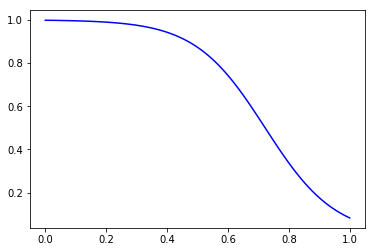

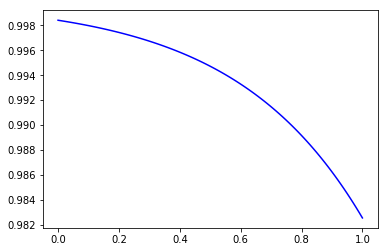

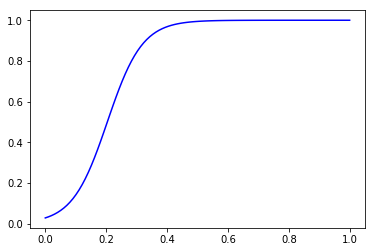

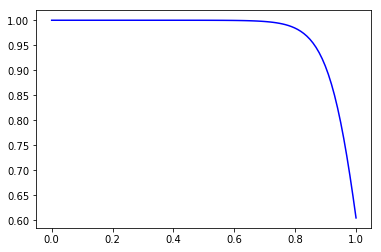

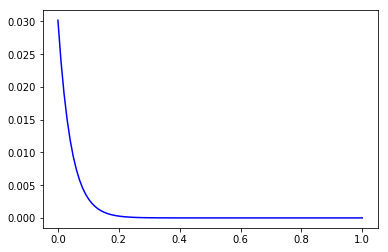

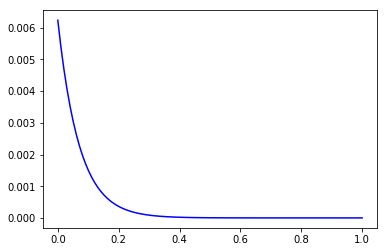

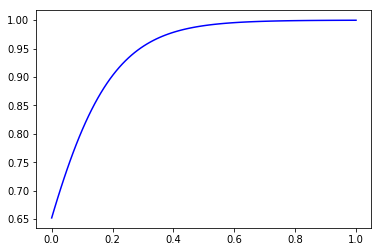

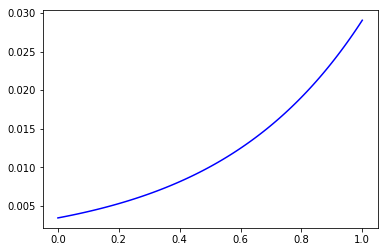

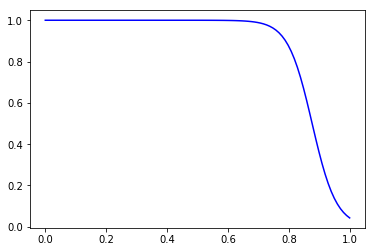

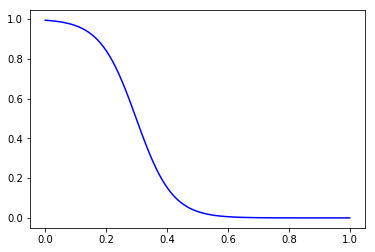

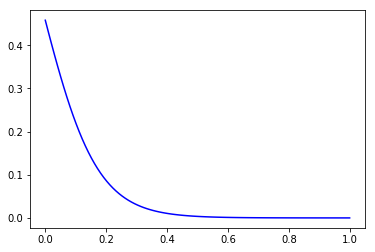

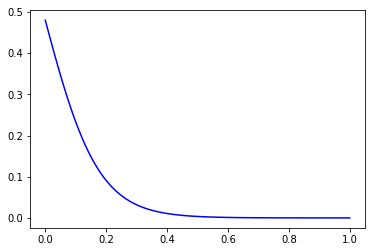

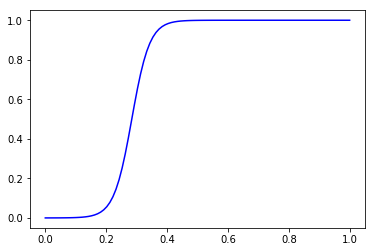

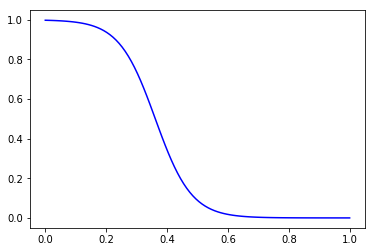

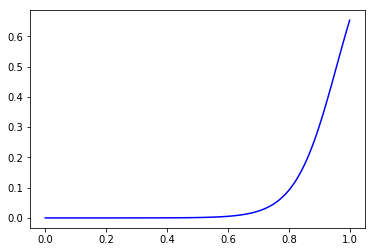

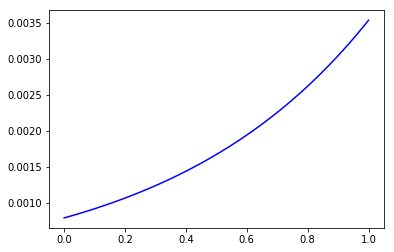

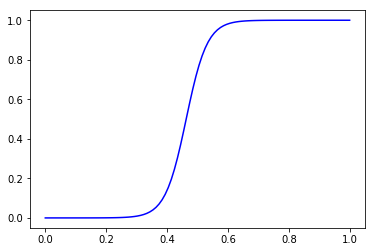

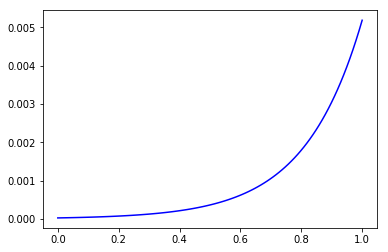

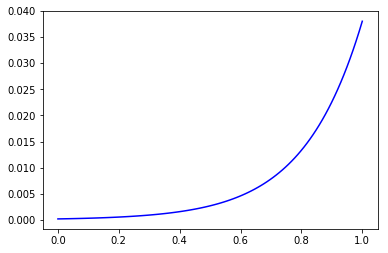

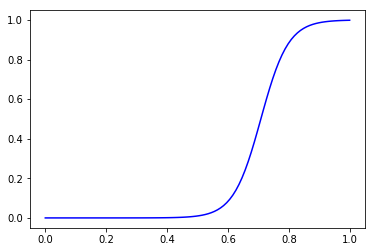

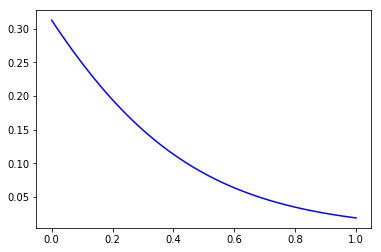

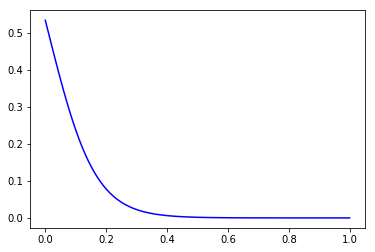

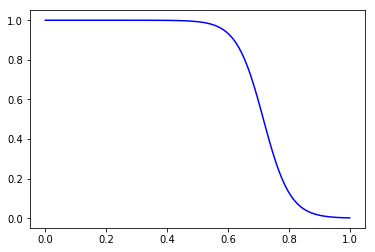

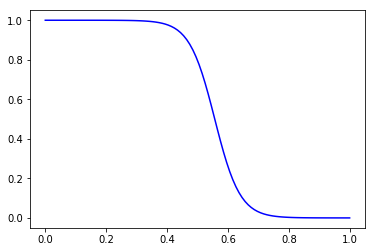

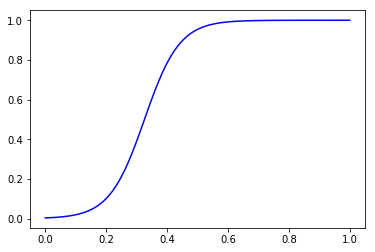

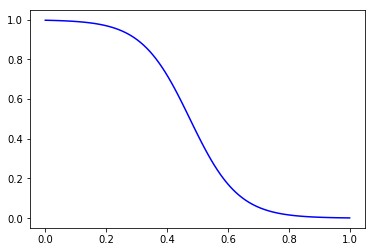

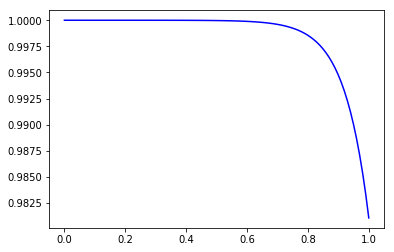

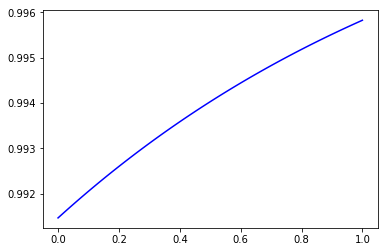

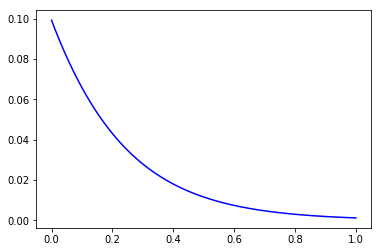

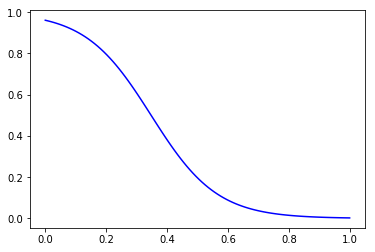

In [77]:
if model.n_layers_ < 3: raise RuntimeError('Must use at least one hidden layer')
for i in range(model.intercepts_[0].shape[0]):
    b = model.intercepts_[0][i]
    w = model.coefs_[0][0,i]
    x = np.linspace(0,1,100)
    f = sigmoid(w*x+b)
    plt.plot(x,f,'b-')
    plt.show()

## Conjunto de Dados #4

In [91]:
train_data = h5py.File('data/train_catvnoncat.h5', 'r')
train_images = train_data['train_set_x'][:]
train_labels = train_data['train_set_y'][:]
test_data = h5py.File('data/test_catvnoncat.h5', 'r')
test_images = test_data['test_set_x'][:]
test_labels = test_data['test_set_y'][:]

print(train_images.shape, train_labels.shape)
print(test_images.shape, test_labels.shape)
print(train_images.min())
print(train_images.max())

(209, 64, 64, 3) (209,)
(50, 64, 64, 3) (50,)
0
255


Para esse conjunto de dados será feita a classificação de gatos ou não gatos com figuras 64x64 pixels RGB

1


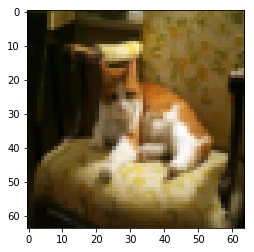

In [92]:
# Exemplo de uma imagem
i = 7
plt.imshow(train_images[i])
print(train_labels[i])

In [93]:
X_train = train_images
X_train = X_train.reshape(X_train.shape[0],-1)/255
y_train = train_labels

X_test = test_images
X_test = X_test.reshape(X_test.shape[0],-1)/255
y_test = test_labels

X_train.shape,y_train.shape

((209, 12288), (209,))

O objetivo era obter pelo menos 72% de acurácia de teste. Ajustando o número de unidades da camada oculta (50) conseguimos 76% de acurácia com a função de ativação logística.

In [96]:
model = MLPClassifier(hidden_layer_sizes=(50,), activation='logistic', solver='lbfgs', alpha=1e-5, max_iter=500)
model.fit(X_train, y_train)
print('Train accuracy:',model.score(X_train, y_train))
print('Test accuracy:',model.score(X_test, y_test))

Train accuracy: 1.0
Test accuracy: 0.76


In [97]:
prediction = model.predict(X_test)
print("Conjunto de teste: ", y_test[0:10])
print("Predição: ", prediction[0:10])

Conjunto de teste:  [1 1 1 1 1 0 1 1 1 1]
Predição:  [1 0 1 1 0 0 0 1 1 1]


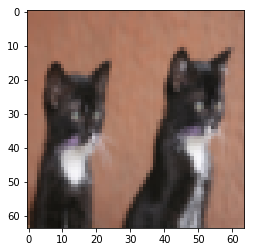

predição:  1


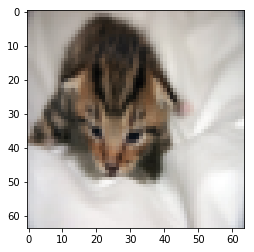

predição:  0


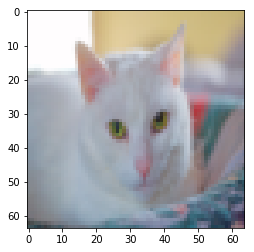

predição:  1


In [98]:
image = X_test.reshape(-1,64,64,3)
for i in range(3):
    plt.imshow(image[i])
    plt.show()
    print("predição: ",prediction[i])

## Opcional

### 1)

In [99]:
coefs = model.coefs_

In [100]:
len(coefs)

2

In [101]:
coef0 = coefs[0]
coef0.shape

(12288, 50)

Visualização dos pesos da primeira camada oculta

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

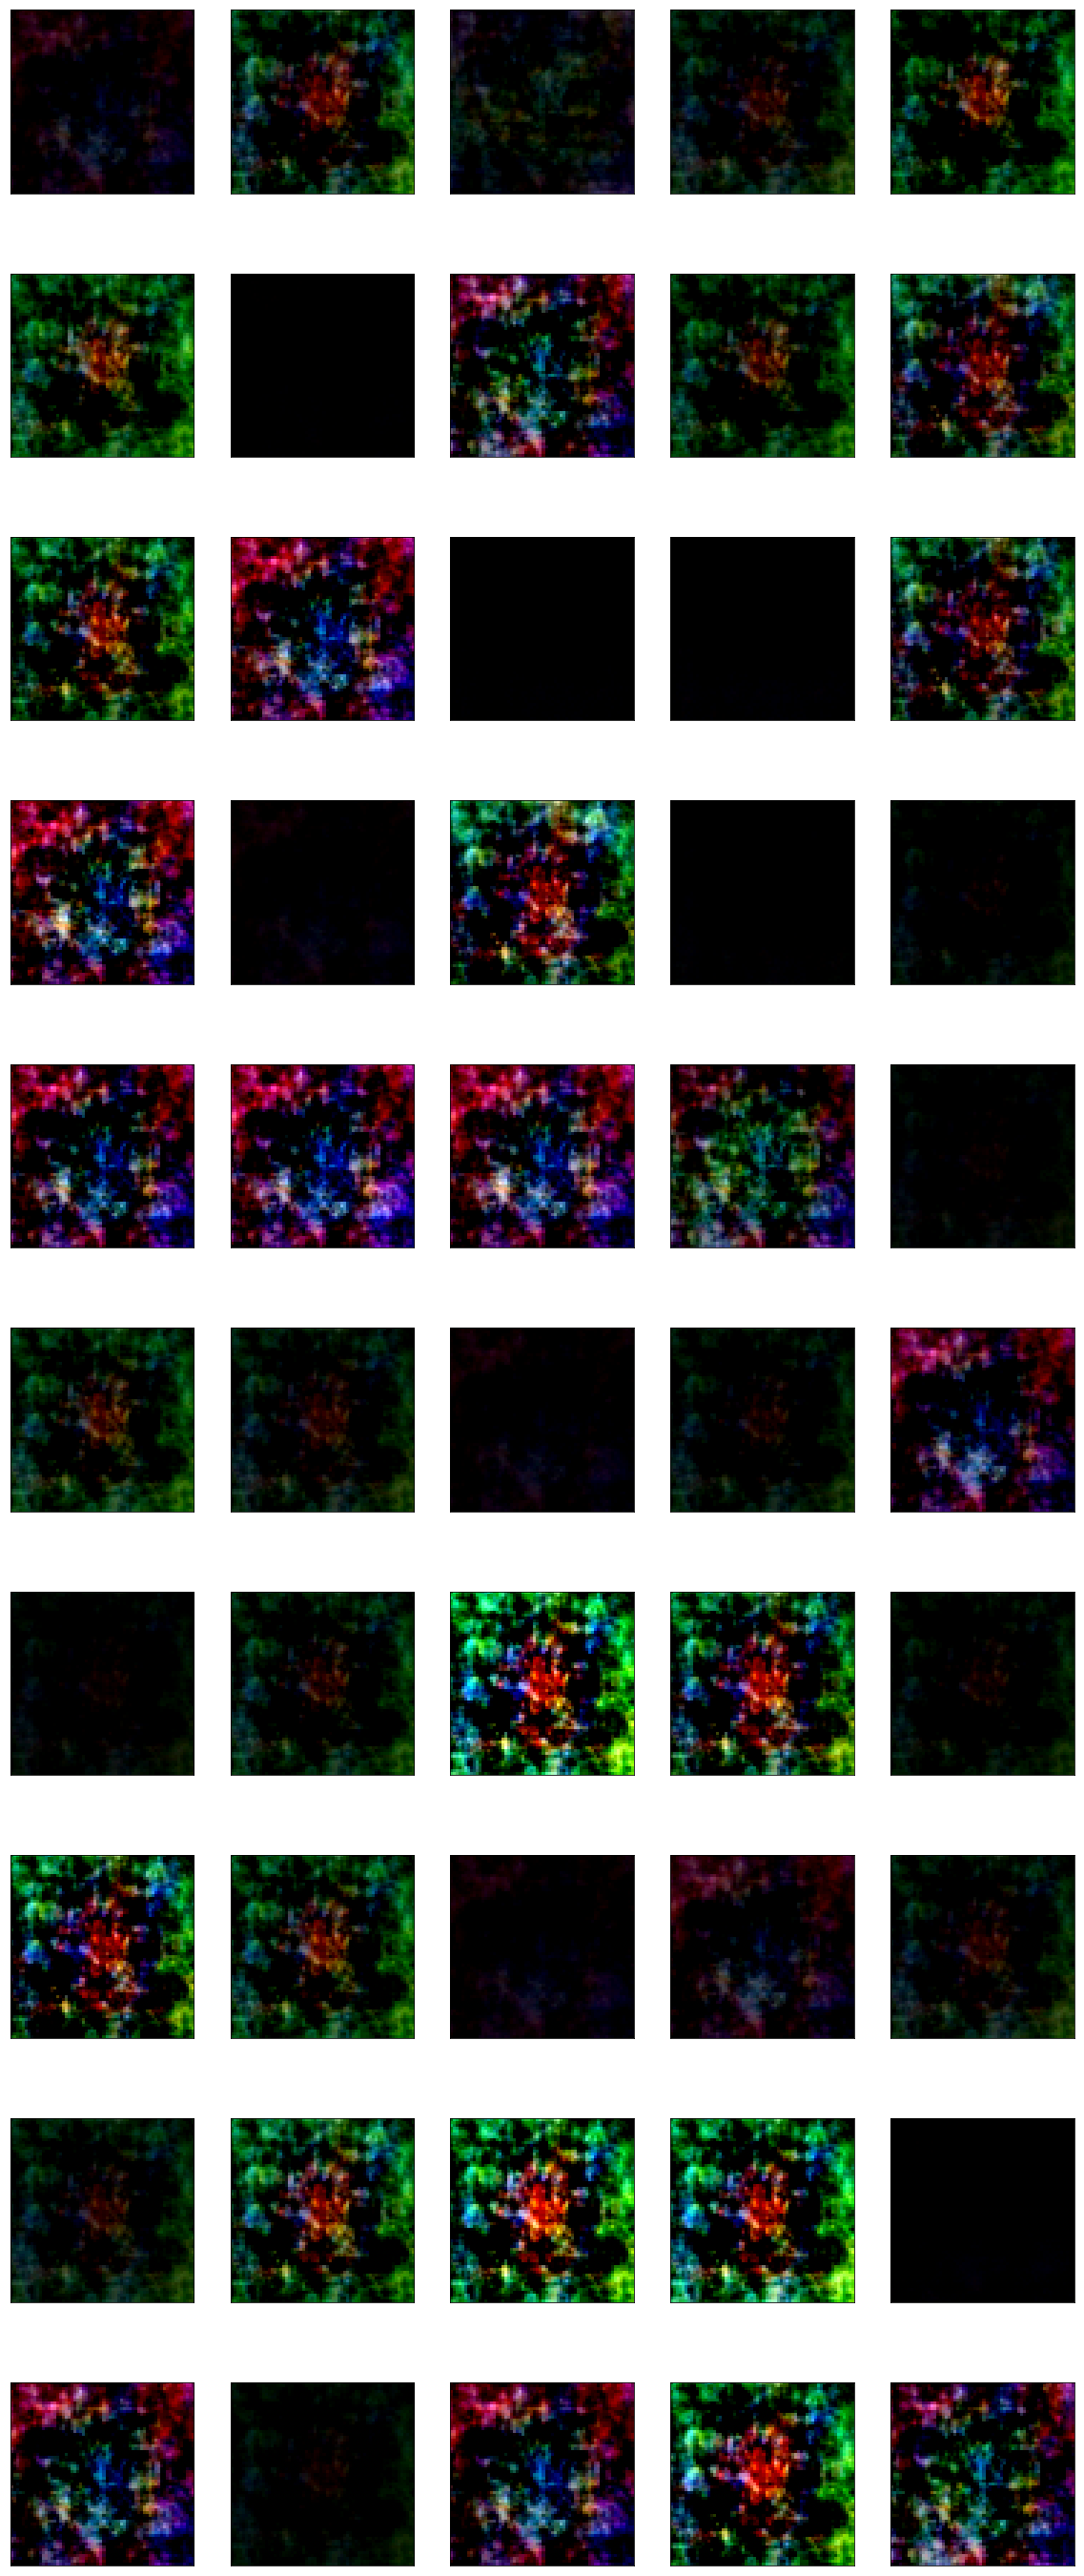

In [104]:
fig, axes = plt.subplots(10, 5,figsize=(20,50))
# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = coefs[0].min(), coefs[0].max()
for coef, ax in zip(coefs[0].T, axes.ravel()):
    ax.imshow(coef.reshape(64, 64, 3), vmin=.5 * vmin,
               vmax=.5 * vmax)
    ax.set_xticks(())
    ax.set_yticks(())

plt.show()

### 2)

In [37]:
mnist = fetch_mldata('MNIST original', data_home='./data')

In [38]:
X = mnist['data']
y = mnist['target']

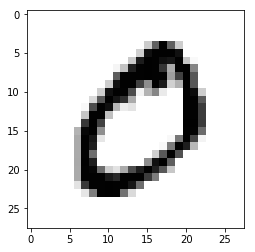

y[0]:  0.0


In [39]:
example = X[0].reshape(28,28)
plt.imshow(example,cmap=plt.cm.binary)
plt.show()
print("y[0]: ", y[0])

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [41]:
X_train = X_train/255.0
X_test = X_test/255.0
X_test[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [42]:
model = MLPClassifier(hidden_layer_sizes=(50,), activation='relu', solver='adam', alpha=1e-5, max_iter=200)
model.fit(X_train, y_train)
print('Train accuracy:',model.score(X_train, y_train))
print('Test accuracy:',model.score(X_test, y_test))

Train accuracy: 0.999734693877551
Test accuracy: 0.9680952380952381


In [43]:
model = MLPClassifier(hidden_layer_sizes=(50,), activation='logistic', solver='lbfgs', alpha=1e-5, max_iter=200)
model.fit(X_train, y_train)
print('Train accuracy:',model.score(X_train, y_train))
print('Test accuracy:',model.score(X_test, y_test))

Train accuracy: 0.9994285714285714
Test accuracy: 0.9625238095238096


In [44]:
prediction = model.predict(X_test)
print("Conjunto de teste: ", y_test[0:10])
print("Predição: ", prediction[0:10])

Conjunto de teste:  [1. 9. 2. 2. 7. 1. 8. 3. 3. 7.]
Predição:  [1. 9. 2. 2. 7. 1. 8. 3. 3. 7.]


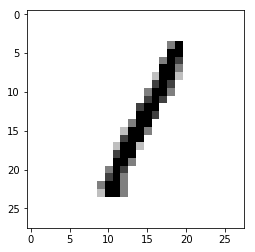

predição:  1.0


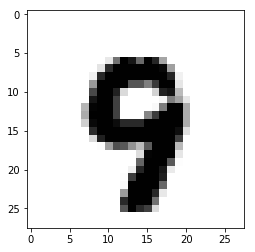

predição:  9.0


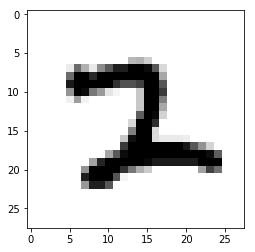

predição:  2.0


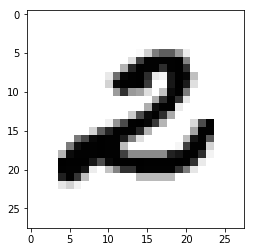

predição:  2.0


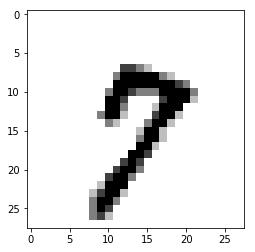

predição:  7.0


In [45]:
image = X_test.reshape(-1,28,28)
for i in range(5):
    plt.imshow(image[i],cmap=plt.cm.binary)
    plt.show()
    print("predição: ",prediction[i])

## Keras

In [46]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.nn import relu, softmax
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import normalize

In [47]:
# X_train = normalize(X_train, axis=1)
# X_test = normalize(X_test, axis=1)

In [48]:
model = Sequential()

model.add(Dense(128, activation=relu))
model.add(Dense(128, activation=relu))
model.add(Dense(10, activation=softmax))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [49]:
model.fit(X_train, y_train, epochs=3,validation_data=(X_test, y_test))

Train on 49000 samples, validate on 21000 samples
Epoch 1/3
49000/49000 [==============================] - 16s 320us/step - loss: 0.2477 - acc: 0.9273 - val_loss: 0.1302 - val_acc: 0.9620
Epoch 2/3
49000/49000 [==============================] - 6s 129us/step - loss: 0.1033 - acc: 0.9673 - val_loss: 0.1173 - val_acc: 0.9637
Epoch 3/3
49000/49000 [==============================] - 6s 133us/step - loss: 0.0712 - acc: 0.9771 - val_loss: 0.0927 - val_acc: 0.9717


In [50]:
predictions = model.predict(X_test)

In [51]:
predictions[0]

array([8.8780084e-08, 9.9963665e-01, 8.6251293e-06, 1.6539541e-06,
       7.3468000e-05, 2.3288115e-07, 5.3090037e-07, 2.7260330e-04,
       2.2192778e-06, 3.8437729e-06], dtype=float32)

In [52]:
pred = [np.argmax(predictions[i]) for i in range(10)]
print("Conjunto de teste: ", y_test[0:10])
print("Predição: ", pred[0:10])

Conjunto de teste:  [1. 9. 2. 2. 7. 1. 8. 3. 3. 7.]
Predição:  [1, 9, 2, 2, 7, 1, 8, 3, 3, 7]


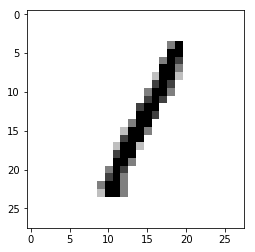

predição:  1


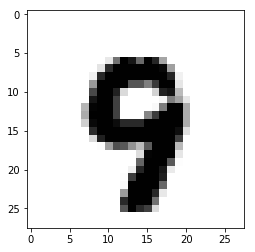

predição:  9


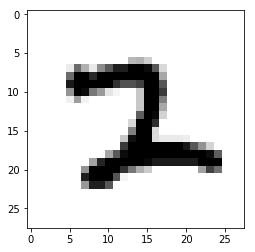

predição:  2


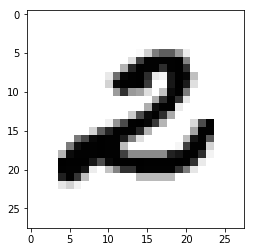

predição:  2


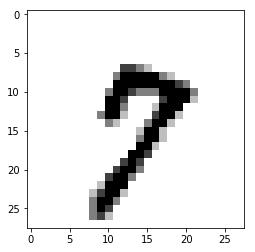

predição:  7


In [53]:
image = X_test.reshape(-1,28,28)
for i in range(5):
    plt.imshow(image[i],cmap=plt.cm.binary)
    plt.show()
    print("predição: ",pred[i])